<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
filename = 'train.csv'
_df = pd.read_csv(filename)
_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
# 欠損値確認
_df.info()
_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
# 不要要素(ID, 名前)の削除
_df = _df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
# Cabinは欠損値が多いのでカラムごと削除
_df = _df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]
_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


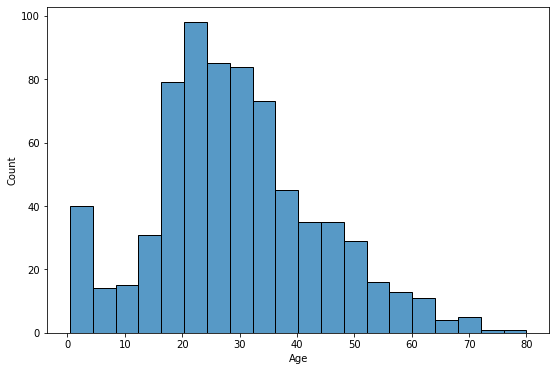

In [55]:
# Ageは欠損値が多いのでヒストグラム確認
plt.figure(figsize=(9,6))
sns.histplot(x='Age', data=_df)
plt.show()

In [56]:
_df.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [59]:
# Ageの欠損値は中央値で補完
_df[['Age']] = _df[['Age']].fillna(_df['Age'].median())

In [61]:
# Embarkedの欠損値は削除
df = _df.dropna()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [65]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


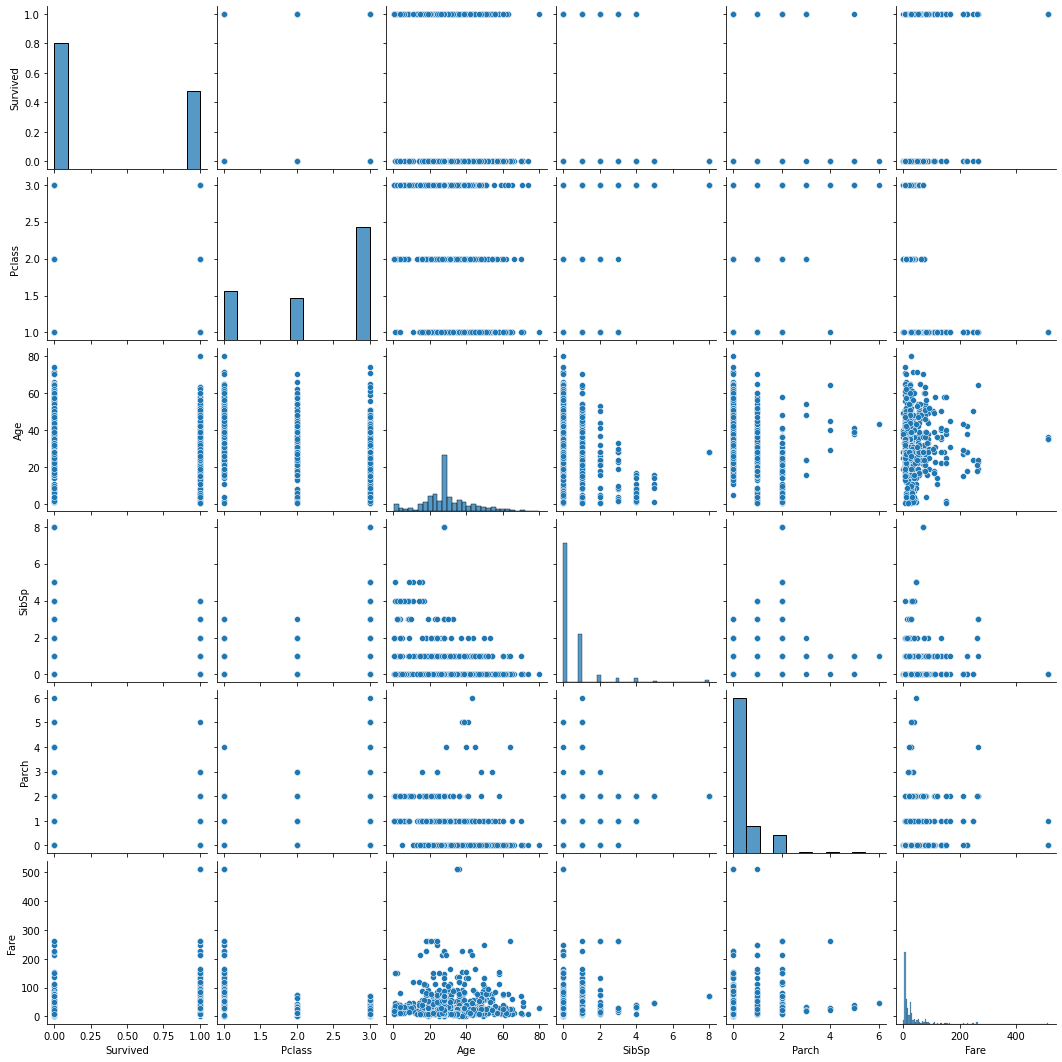

In [66]:
sns.pairplot(data=df)

In [ ]:
# Survivedをロジスティクス回帰により判別

In [91]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [99]:
# テスト用データセットの準備
test_data = 'test.csv'
df_test = pd.read_csv(test_data)
df_test[['Age']] = df_test[['Age']].fillna(_df['Age'].median())
df_test[['Fare']] = df_test[['Fare']].fillna(_df['Age'].median())
df_test = df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [90]:
# 学習用データセットの準備
df_train = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train = df_train.drop(['Survived'], axis=1)
t_train = df_train['Survived']

In [102]:
LR_model.fit(X_train, t_train)
t_test = LR_model.predict(df_test)
print(t_test)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 0]


In [110]:
# 予測値入力、提出ファイル出力
df_gen = pd.read_csv('gender_submission.csv')
df_gen['Survived'] =t_test
df_gen.to_csv('gender_submission_2.csv')

In [ ]:
# カテゴリ変数も加えてロジスティクス回帰

In [129]:
filename = 'train.csv'
_df = pd.read_csv(filename)

# 不要要素の削除
_df = _df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# Ageの欠損値は中央値で補完
_df[['Age']] = _df[['Age']].fillna(_df['Age'].median())
# Embarkedの欠損値は削除
_df = _df.dropna()
# Sexをダミー変数にして代入
_df['Sex']=pd.get_dummies(_df['Sex'])
# Embarkedをダミー変数にして代入
_df['Embarked']=pd.get_dummies(_df['Embarked'])


In [117]:
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.626168,36.688879,0.420561,0.359813,84.193516
2,0.472826,29.765380,0.402174,0.380435,20.662183
3,0.242363,25.932627,0.615071,0.393075,13.675550


In [135]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [136]:
# テスト用データセットの準備
df_test = pd.read_csv('test.csv')
df_test[['Age']] = df_test[['Age']].fillna(_df['Age'].median())
df_test[['Fare']] = df_test[['Fare']].fillna(_df['Age'].median())
df_test['Sex']=pd.get_dummies(df_test['Sex'])
df_test['Embarked']=pd.get_dummies(df_test['Embarked'])
df_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [138]:
# 学習用データセットの準備
df_train = pd.read_csv('train.csv')
df_train = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_train['Sex']=pd.get_dummies(df_train['Sex'])
df_train['Embarked']=pd.get_dummies(df_train['Embarked'])
X_train = df_train.drop(['Survived'], axis=1)
t_train = df_train['Survived']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [139]:
LR_model.fit(X_train, t_train)
t_test = LR_model.predict(df_test)
print(t_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
# 予測値入力、提出ファイル出力
df_gen = pd.read_csv('gender_submission.csv')
df_gen['Survived'] =t_test
df_gen.to_csv('gender_submission_3.csv', index=False)